/kaggle/input/newretransform/new_retransform.py
/kaggle/input/retransform/retransform.py


100%|██████████| 170498071/170498071 [00:05<00:00, 29805057.87it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


/opt/conda/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/opt/conda/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


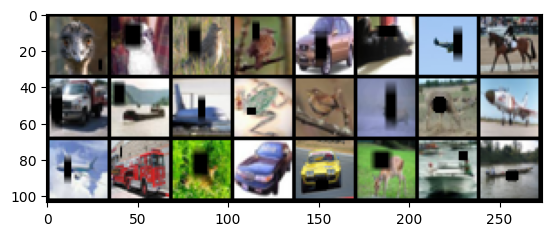

In [1]:
import os
import sys
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
import random
import numpy as np

import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim
import torch.utils.data
import torchvision.datasets as datasets

sys.path.append('/kaggle/input/newretransform/')
from new_retransform import RandomErasingTransform

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

normalize = transforms.Normalize(mean=[0.5], std=[0.5])

transform = transforms.Compose([
    transforms.ToTensor(),
    RandomErasingTransform(probability=0.9, value=(0, 0, 0), sl=0.02, sh=0.33, shape="random", blend_edges=True, blend_type="random", blend_factor=3),
])  


# # Load the CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=24, shuffle=True, num_workers=2, pin_memory=True)

# Get a batch of data
images, labels = next(iter(trainloader))

# Function to show images
def imshow(img):
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

# Plot the images
grid_images = torchvision.utils.make_grid(images)
imshow(grid_images)

